# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create lists to hold data
citiestwo = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [5]:
# Set counter for record and sets
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print("------------------------")
print("Beginning Exploration")
print("------------------------")

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print("Processing record {} of set {} | {}".format(record_counter, set_counter, city))
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        citiestwo.append(city)
    except:
        print("City not found! Next...")
        pass

print('-------------------------')
print('Data Exploration Complete')



 36 of set 2 | hobyo
Processing record 37 of set 2 | cabo san lucas
Processing record 38 of set 2 | jamestown
Processing record 39 of set 2 | churapcha
Processing record 40 of set 2 | merauke
Processing record 41 of set 2 | airai
Processing record 42 of set 2 | thompson
Processing record 43 of set 2 | camboriu
City not found! Next...
Processing record 44 of set 2 | butaritari
Processing record 45 of set 2 | padureni
City not found! Next...
Processing record 46 of set 2 | ribeira grande
Processing record 47 of set 2 | naze
Processing record 48 of set 2 | marsh harbour
Processing record 49 of set 2 | solnechnyy
Processing record 50 of set 2 | carnarvon
Processing record 0 of set 3 | egvekinot
Processing record 1 of set 3 | la gaulette
City not found! Next...
Processing record 2 of set 3 | hobart
Processing record 3 of set 3 | krasnoselkup
Processing record 4 of set 3 | sibolga
Processing record 5 of set 3 | avarua
Processing record 6 of set 3 | wanning
Processing record 7 of set 3 | torb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dataframe from the above categories
weather = {
    "City": citiestwo,
    "Cloudiness" : cloudiness,
    "Date" : date,
    "Temp": temp,
    "Wind Speed" : wind,
    "Humidity" : humidity,
    "Country" : country,
    "Lat" : lat,
    "Long" : lng,   
}
weather_df = pd.DataFrame(weather)
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
weather_df

,City,Cloudiness,Date,Temp,Wind Speed,Humidity,Country,Lat,Long
0,port lincoln,100,1970-01-01 00:00:01.596660445,49.86,19.30,68,AU,-34.73,135.87
1,hermanus,42,1970-01-01 00:00:01.596659919,43.00,1.01,94,ZA,-34.42,19.23
2,verkhniy avzyan,48,1970-01-01 00:00:01.596660446,62.78,5.37,83,RU,53.53,57.54
3,chokurdakh,13,1970-01-01 00:00:01.596659637,59.43,6.80,48,RU,70.63,147.92
4,olinda,40,1970-01-01 00:00:01.596659972,78.80,18.34,65,BR,-8.01,-34.86
...,...,...,...,...,...,...,...,...,...
542,beloomut,35,1970-01-01 00:00:01.596660513,57.99,2.17,69,RU,54.94,39.34
543,gamba,53,1970-01-01 00:00:01.596660513,72.34,4.74,84,GA,-2.65,10.00
544,beaverlodge,20,1970-01-01 00:00:01.596660513,78.80,10.29,39,CA,55.22,-119.44
545,balabac,100,1970-01-01 00:00:01.596660513,80.13,10.92,85,PH,7.99,117.06


In [10]:
# Put into a csv

weather_df.to_csv("../output_data/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
#### This code is analyzing the latitude of the 597 cities that were collected from the API and each of the plotted dots represents those cities and the maximum temperature it reached.

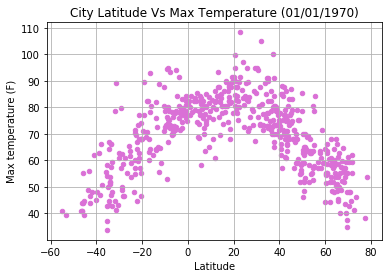

In [36]:
weather_df.plot(kind="scatter", x="Lat", y="Temp", c="orchid")
plt.title("City Latitude Vs Max Temperature (01/01/1970)")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.grid()
plt.savefig("../output_data/LatitudeVsTemp.png")


#### Latitude vs. Humidity Plot
#### This code is analyzing the latitude of the 597 cities that were collected from the API and each of the plotted dots represents those cities and humidity percentage it reached.

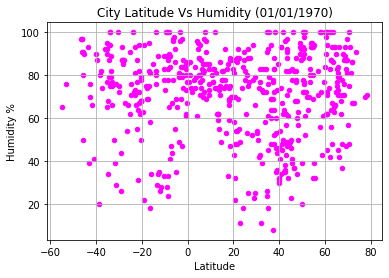

In [37]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", c="magenta")
plt.title("City Latitude Vs Humidity (01/01/1970)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("../output_data/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot
#### This code is analyzing the latitude of the 597 cities that were collected from the API and each of the plotted dots represents those cities and cloudiness percentage it reached.

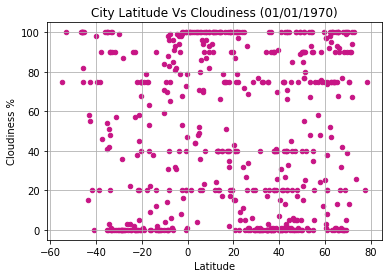

In [38]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", c="mediumvioletred")
plt.title("City Latitude Vs Cloudiness (01/01/1970)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig("../output_data/LatitudeVsCloudiness.png")


#### Latitude vs. Wind Speed Plot
#### This code is analyzing the latitude of the 597 cities that were collected from the API and each of the plotted dots represents those cities and windspeed it reached.

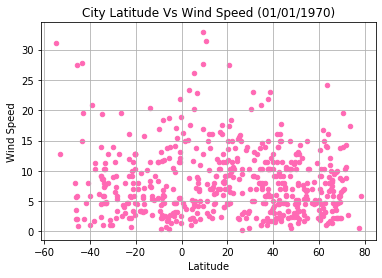

In [39]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", c="hotpink")
plt.title("City Latitude Vs Wind Speed (01/01/1970)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../output_data/LatitudeVsWindSpeed.png")

# Analysis 

#### On the first of the year in 1970, those cities that sat just 20 degrees north of the equator were very warm at this time and the closer you get to the equator the warmer it gets. 
#### There's no city in this data set with a humidity lower than around 10%, there are no "bone dry" cities.
#### Measuring wind speed and cloudiness in this dataset compared to latitude it is hard to determine exactly what the differences are between cities on this particular day. 
#### This data set may skew more north of the equator given that no measurements are made for those 80 degrees south. 